In [2]:
import os
import json

import pandas as pd

ignore_keys = set(['args_dict', 'label_count'])


In [6]:
def get_scores_df(scores):
    tuples = []
    for setting in scores:
        if setting in ignore_keys:
            continue
        for label in scores[setting]:
            for k in scores[setting][label]:
                score = 0
                if len(scores[setting][label][k]) > 0:
                    score = max(scores[setting][label][k])
                tuples.append((setting, label, k, score))

    df = pd.DataFrame(tuples, columns=['setting', 'label', 'k', 'precision'])

    return df

all_tests = {
    'COCO 2014': [
        ('clean_copy/15_real_classes_coco2k', 'Colors'),
        ('clean_copy/15_real_classes_coco2k_bbox_ar', 'BBox AR.'),
        ('clean_copy/15_real_classes_coco2k_bbox_size', 'BBox Size'),
        ('clean_copy/semantic/coco_customs_15', 'Semantic'),
    ],
    'Visual Genome': [
        ('clean_copy/15_real_classes_vgg2k', 'Colors'),
        ('clean_copy/15_real_classes_vgg2k_bbox_ar', 'BBox AR.'),
        ('clean_copy/15_real_classes_vgg2k_bbox_size', 'BBox Size'),
        ('clean_copy/semantic/vgg_customs_new', 'Semantic'),
    ],
    'BDD 100k': [
        ('clean_copy/8_bdd_color', 'Colors'),
        ('clean_copy/8_bdd_bbox_ar', 'BBox AR.'),
        ('clean_copy/8_bdd_bbox_size', 'BBox Size'),
        ('clean_copy/semantic/bdd_customs/weather/output', 'Semantic'),
        ('clean_copy/semantic/bdd_customs/scene/output', 'Semantic'),
        ('clean_copy/semantic/bdd_customs/timeofday/output', 'Semantic'),
    ],

}

# all_results = []
all_results = {}
test_folder_to_name = {
    '15_real_classes_vgg2k': 'Colors',
    '15_real_classes_vgg2k_bbox_ar': 'BBox AR.',
    '15_real_classes_vgg2k_bbox_size': 'BBox Size',
    'semantic/vgg_customs_new/output': 'Semantic',
    '15_real_classes_coco2k': 'Colors',
    '15_real_classes_coco2k_bbox_ar': 'BBox AR.',
    '15_real_classes_coco2k_bbox_size': 'BBox Size',
    'semantic/coco_customs_15': 'Semantic',
    '8_bdd_color': 'Colors',
    '8_bdd_bbox_ar': 'BBox AR.',
    '8_bdd_bbox_size': 'BBox Size',
    'semantic/bdd_customs/weather/output': 'Semantic',
    'semantic/bdd_customs/scene/output': 'Semantic',
    'semantic/bdd_customs/timeofday/output': 'Semantic',
    'semantic/vgg_customs_new': 'Semantic'
}

new_test_folder_to_name = {}
for k, v in test_folder_to_name.items():
    new_test_folder_to_name['clean_copy/' + k] = v

test_folder_to_name = new_test_folder_to_name

my_k = 500
my_supp = 10
my_dedup = 0.5
            
domino_y = 40
domino_comp = 100

allowed_vcr = set([
    'vcr_k{}_abs1_area1_aspect1_embed_clip_supp{}_dedup{}_rerun1'.format(my_k, my_supp, my_dedup),
    'vcr_k{}_abs0_area0_aspect0_embed_clip_supp{}_dedup{}_rerun1'.format(my_k, my_supp, my_dedup),
    'vcr_no_concepts_embed_clip_supp{}_dedup{}_rerun1'.format(my_supp, my_dedup),
]) 

domino_allowed = set([
    'domino_eval_n10_embed_clip16_y{}_comp{}'.format(domino_y, domino_comp),
])


# test_folder = '15_real_classes_coco2k'
for dataset_name, test_folders in all_tests.items():
    all_results[dataset_name] = []
    for (test_folder, _) in test_folders:
        for file in os.listdir(test_folder):
            if not os.path.isdir(os.path.join(test_folder, file)):
                continue

            name = file
            passed = False
            if ('vcr' in name) and (name not in allowed_vcr):
                continue
            else:
                passed = True

            if ('domino' in name) and (name not in domino_allowed):
                continue
            else:
                passed = True
            
            if not passed:
                continue

            if 'dino' in name:
                continue

            print('-----', file, '-----')
            for subfile in sorted(os.listdir(os.path.join(test_folder, file))):
                if subfile.endswith('.json'):
                    # print(subfile)
                    with open(os.path.join(test_folder, file, subfile), 'r') as f:
                        scores = json.load(f)

                    df = get_scores_df(scores)
                    df['folder'] = test_folder
                    df['test'] = file
                    df['file'] = subfile
                    all_results[dataset_name].append(df)

----- vcr_k500_abs0_area0_aspect0_embed_clip_supp10_dedup0.5_rerun1 -----
----- vcr_no_concepts_embed_clip_supp10_dedup0.5_rerun1 -----
----- vcr_k500_abs1_area1_aspect1_embed_clip_supp10_dedup0.5_rerun1 -----
----- domino_eval_n10_embed_clip16_y40_comp100 -----
----- vcr_k500_abs1_area1_aspect1_embed_clip_supp10_dedup0.5_rerun1 -----
----- domino_eval_n10_embed_clip16_y40_comp100 -----
----- vcr_no_concepts_embed_clip_supp10_dedup0.5_rerun1 -----
----- vcr_k500_abs0_area0_aspect0_embed_clip_supp10_dedup0.5_rerun1 -----
----- vcr_k500_abs1_area1_aspect1_embed_clip_supp10_dedup0.5_rerun1 -----
----- vcr_k500_abs0_area0_aspect0_embed_clip_supp10_dedup0.5_rerun1 -----
----- vcr_no_concepts_embed_clip_supp10_dedup0.5_rerun1 -----
----- domino_eval_n10_embed_clip16_y40_comp100 -----
----- vcr_k500_abs1_area1_aspect1_embed_clip_supp10_dedup0.5_rerun1 -----
----- domino_eval_n10_embed_clip16_y40_comp100 -----
----- vcr_no_concepts_embed_clip_supp10_dedup0.5_rerun1 -----
----- vcr_k500_abs0_ar

In [3]:
pd.concat(all_results['BDD 100k'])['test'].unique()

/tmp/ipykernel_139729/1148109485.py:1: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  pd.concat(all_results['BDD 100k'])['test'].unique()


array(['vcr_k500_abs1_area1_aspect1_embed_clip_supp10_dedup0.5',
       'vcr_k500_abs0_area0_aspect0_embed_clip_supp10_dedup0.5',
       'domino_eval_n10_embed_clip16_y40_comp100',
       'vcr_no_concepts_embed_clip_supp10_dedup0.5'], dtype=object)

processing COCO 2014
3120


OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

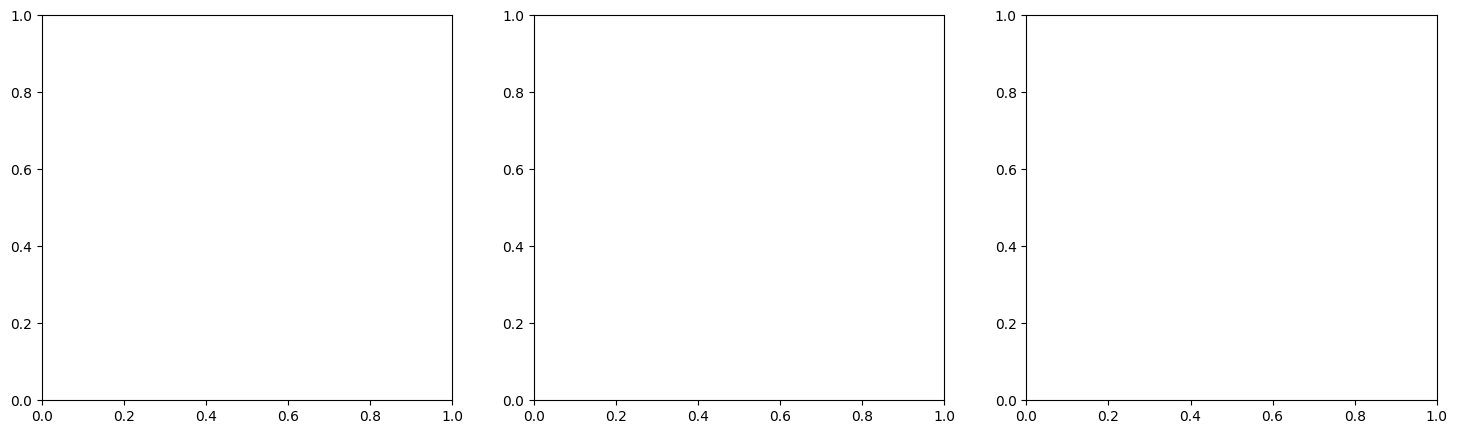

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(1, 3, figsize=(18, 5))

precision = 10
setting = 'high'
col_nu = 0

colors = ['#68b0ab', '#dad7cd', '#adc178', '#6a994e', '#3a5a40']

for dataset_name, results in all_results.items():
    print('processing', dataset_name)
    all_results_cat = pd.concat(results)

    overall = all_results_cat
    overall = overall[overall['setting'] == setting]
    overall = overall[overall['k'] == str(precision)]
    overall = overall[overall['test'] != 'domino_eval_n15']
    overall = overall[overall['test'] != 'domino_eval_n5']
    overall['folder'] = overall['folder'].map(test_folder_to_name)

    print(len(overall))

    new_test_names = []
    for test in overall['test']:
        if 'abs0' in test or 'concepts_only' in test:
            new_test_names.append('VCR (Concepts)')
        elif 'abs1' in test or test=='vcr_200':
            new_test_names.append('VCR')
        elif 'domino_eval_n10' in test:
            new_test_names.append('Domino (CLIP)')
        elif 'no_concepts' in test:
            new_test_names.append('VCR (Metadata)')
        else:
            new_test_names.append(test)
            print('yikes', test)

    overall['test'] = new_test_names
    hue_order = sorted(overall['test'].unique())
    top_right_corner = (col_nu == len(all_tests) - 1)

    hue_order = [
        'Domino (CLIP)',
        'VCR (Metadata)',
        'VCR (Concepts)',
        'VCR'
    ]

    # display(overall.head(5))
    # display(overall)

    plt.style.use('seaborn-whitegrid')
    # sns.set_style("whitegrid")
    # plt.style.use('seaborn-paper')
    sns.barplot(data=overall, x='folder', hue='test', y='precision',
                palette=colors,
                ax=ax[col_nu], hue_order=hue_order)
    # Increase font size of x-axis labels
    for item in ax[col_nu].get_xticklabels():
        item.set_fontsize(16)
    ax[col_nu].set_xlabel('')
    if col_nu == 0:
        ax[col_nu].set_ylabel('Precision@{}'.format(precision), fontsize=24)
    else:
        ax[col_nu].set_ylabel('')
    ax[col_nu].set_title(dataset_name,y=0.9, fontsize=22)
    ax[col_nu].set_ylim(0, 1)
    ax[col_nu].set_yticks([0, 0.2, 0.4, 0.6, 0.8,1])
    ax[col_nu].set_yticklabels([0, 0.2, 0.4, 0.6, 0.8,1], fontsize=16)
    ax[col_nu].set_xticklabels(['Color', 'Size', "AR", "Semantic"], fontsize=16)

    if col_nu==1:
        legend = ax[col_nu].legend( loc='upper center', bbox_to_anchor=(0.5, 1.2), 
                    ncol=4, fontsize=20)
    else:
        ax[col_nu].legend_.remove()

    col_nu += 1

plt.subplots_adjust(wspace=0.1)
plt.savefig('bench.pdf', dpi=300,bbox_inches='tight')
